# Jupyter Notebook 11 - Exploring SQL Results - Baseline Models

---

# Introduction

We will use this notebook to explore results of the Baseline Models and the Real Time models for the report.

If there is time, this will be contuined with the Dashboard.

In [2]:
# Librarires
import mysql.connector
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import fastavro
from avro import schema, datafile, io
import ast
import os
from sklearn.decomposition import PCA
from joblib import load
from sklearn.cluster import KMeans
import plotly.express as px


In [3]:
import warnings
warnings.filterwarnings('ignore')

# Connect to SQL Database

In [4]:
config = {
    "user":"root",
    "password":"root",
    "host": "localhost",
    "database":"mtu_capstone_db",
    "raise_on_warnings":True
}

In [5]:
cnx = mysql.connector.connect(**config)
cursor = cnx.cursor()

In [6]:
# Test the connection

try:
    cnx = mysql.connector.connect(**config)
    cursor = cnx.cursor()
    cursor.execute("SELECT COUNT(*) FROM baseline_model_results;")
    number_of_rows = cursor.fetchone()[0]
    print("Number of rows in 'baseline_model_results':", number_of_rows)
    
except mysql.connector.Error as err:
    print("Error:", err)
    
else:
    cursor.close()
    cnx.close()

Number of rows in 'baseline_model_results': 13


## Extract the Feature names

In [7]:
folder_path = r'C:\Users\Kolobane\OneDrive\CIT MSc Data Science Modules\_Semester Three - Final Project\Project Two - Network Project\Data\Avro Schema'
features_avro_schema_file = "features_avro_schema.avsc" 

In [8]:
# Open the avro schema
with open(folder_path + "\\" + features_avro_schema_file, "rb") as avro_schema_file:
    avro_schema = avro_schema_file.read()
# parse the avro and extract the list of feature names
parsed_schema = schema.parse(avro_schema)
feature_names = [field.name for field in parsed_schema.fields]
print("Feature Names:", feature_names)

Feature Names: ['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Init Fwd Win B

In [9]:
# Create a feature list with names and number.
feature_names = ['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']

# Create a dictionary to map feature indices to names
index_to_feature = {i: name for i, name in enumerate(feature_names)}

In [10]:
# index_to_feature

---

# **Baseline Models**

Explore the baseline model results as a baseline for the Final Report and to compare with the Real TIme Models

---

## **Random Forest Basic Results**

In [11]:
# Establish a new database connection using the config dictionary
cnx = mysql.connector.connect(**config)
cursor = cnx.cursor()

# Retreve the data from the RF basic model
model_id= 2 # access rf baseline basic model
query = f"SELECT * FROM baseline_model_results WHERE id= {model_id};"
df_model_rf_basic =pd.read_sql(query, cnx)

cursor.close()
cnx.close()


In [12]:
df_model_rf_basic 

,id,model_name,timestamp,model_parameters,confusion_matrix,accuracy_value,precision_value,recall_value,f1_value,auc_score,...,model_training_time,silhouette_score,cluster_centers,elbow_method_results,cluster_visualisation_plot,anomaly_score,anomaly_detection_plot,decision_function_values,support_vectors,one_class_svm_plot
0,2,rf_model_baseline_basic,2023-11-15 16:57:02,n_estimators=100,"[[1335345, 3680], [12801, 261893]]",0.989787,0.986143,0.953399,0.969495,0.998741,...,4724.58,None,None,None,None,None,None,None,None,None


In [9]:
df_model_rf_basic

,id,model_name,timestamp,model_parameters,confusion_matrix,accuracy_value,precision_value,recall_value,f1_value,auc_score,...,model_training_time,silhouette_score,cluster_centers,elbow_method_results,cluster_visualisation_plot,anomaly_score,anomaly_detection_plot,decision_function_values,support_vectors,one_class_svm_plot
0,2,rf_model_baseline_basic,2023-11-15 16:57:02,n_estimators=100,"[[1335345, 3680], [12801, 261893]]",0.989787,0.986143,0.953399,0.969495,0.998741,...,4724.58,None,None,None,None,None,None,None,None,None


In [13]:
print(df_model_rf_basic.columns)

Index(['id', 'model_name', 'timestamp', 'model_parameters', 'confusion_matrix',
       'accuracy_value', 'precision_value', 'recall_value', 'f1_value',
       'auc_score', 'ruc_curve', 'precision_recall_curve',
       'feature_importance', 'model_training_time', 'silhouette_score',
       'cluster_centers', 'elbow_method_results', 'cluster_visualisation_plot',
       'anomaly_score', 'anomaly_detection_plot', 'decision_function_values',
       'support_vectors', 'one_class_svm_plot'],
      dtype='object')


### Results of model

In [14]:
print(df_model_rf_basic['accuracy_value'].iloc[0])
print(df_model_rf_basic['precision_value'].iloc[0])
print(df_model_rf_basic['recall_value'].iloc[0])
print(df_model_rf_basic['f1_value'].iloc[0])

0.989787
0.986143
0.953399
0.969495


### Confusion Matrix 

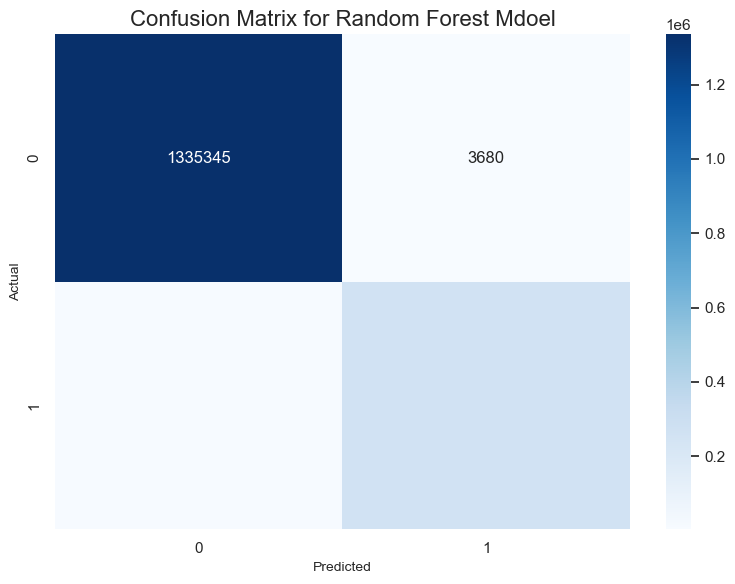

In [15]:
# Extact Json obsjects into useable data and parse into a 2d array
confusion_matrix_json = df_model_rf_basic['confusion_matrix'].iloc[0]
confusion_matrix = np.array(json.loads(confusion_matrix_json))

# Change the theme
sns.set()
sns.set_theme(style="white")

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual', fontsize=10)

plt.subplots_adjust(bottom=0.2)
plt.title('Confusion Matrix for Random Forest Mdoel', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

In [16]:
confusion_matrix 

array([[1335345,    3680],
       [  12801,  261893]])

### Roc and Precision Recall Curve

In [17]:
# Extact Json objects into useable data and parse into a 2d array
roc_curve_data = df_model_rf_basic['ruc_curve'].iloc[0]
roc_curve = json.loads(roc_curve_data)
precision_recall_curve_data = json.loads(df_model_rf_basic['precision_recall_curve'].iloc[0])

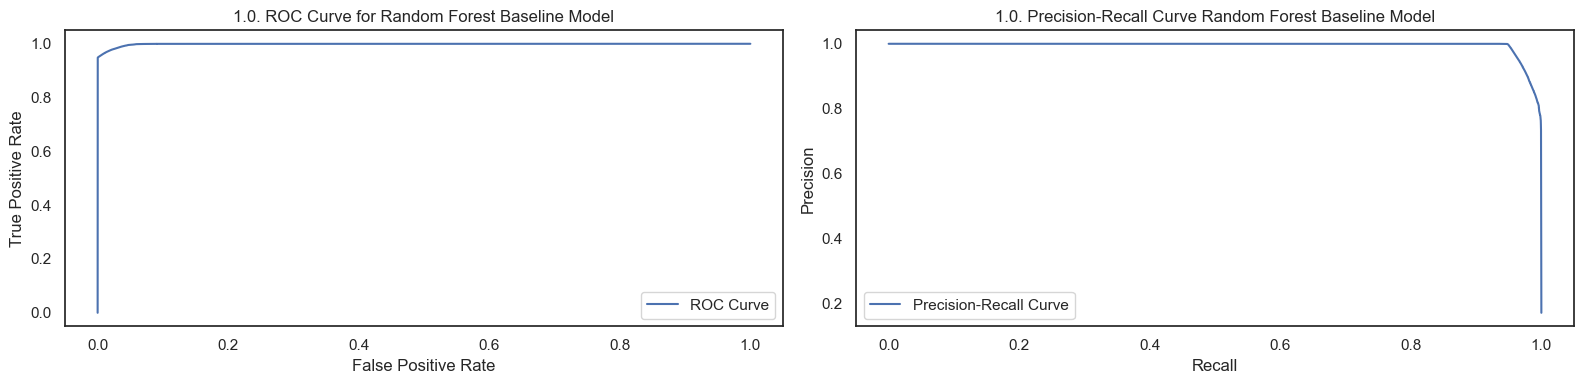

In [18]:
sns.set_theme(style="white")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(roc_curve['fpr'], roc_curve['tpr'], label='ROC Curve')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('1.0. ROC Curve for Random Forest Baseline Model')
ax1.legend()

ax2.plot(precision_recall_curve_data['recall'], precision_recall_curve_data['precision'], label='Precision-Recall Curve')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('1.0. Precision-Recall Curve Random Forest Baseline Model')
ax2.legend()
plt.tight_layout()

save_path = r'C:\Users\Kolobane\OneDrive\CIT MSc Data Science Modules\_Semester Three - Final Project\Project Two - Network Project\Save Plots\rf_baseline_model_compare_roc.png'
plt.savefig(save_path)
plt.tight_layout()
plt.show()

### Feature Importance List

In [19]:
# # Extract data from DB
feature_importance_list = df_model_rf_basic['feature_importance'].iloc[0]

In [20]:
# Plot top ten most important features
combined_data = list(zip(feature_names, feature_importance_list))
sorted_feature_names, sorted_importance_values = zip(*combined_data)
top_10_feature_names = sorted_feature_names[:10]
top_10_importance_values = sorted_importance_values[:10]

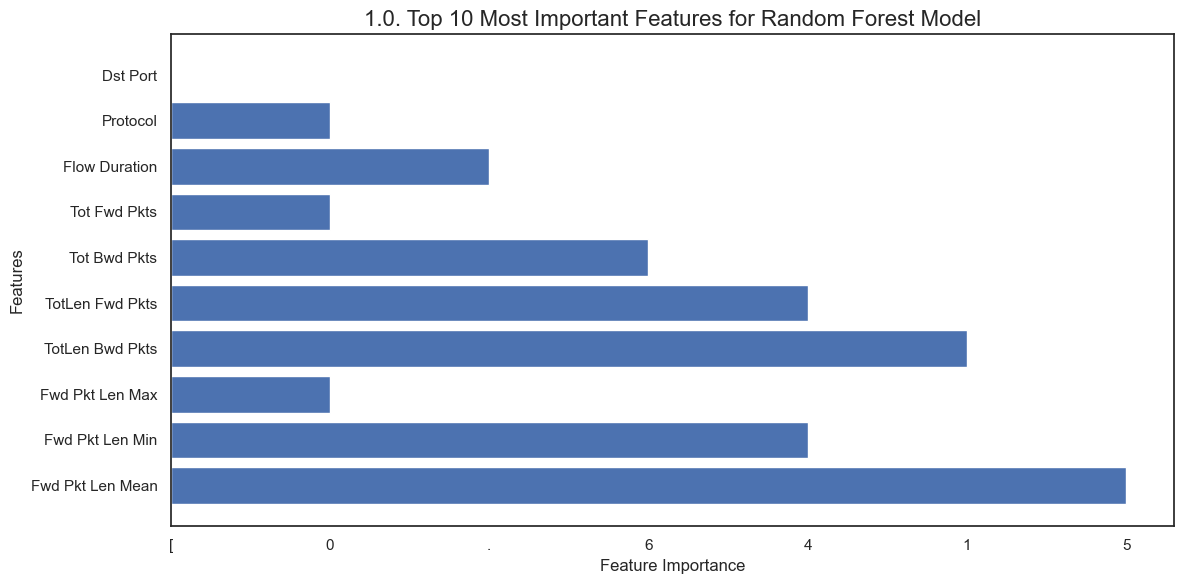

In [21]:
# Plot
sns.set_theme(style="white")

plt.figure(figsize=(12, 6))
plt.barh(top_10_feature_names, top_10_importance_values)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('1.0. Top 10 Most Important Features for Random Forest Model', fontsize=16)
plt.gca().invert_yaxis()



save_path = r'C:\Users\Kolobane\OneDrive\CIT MSc Data Science Modules\_Semester Three - Final Project\Project Two - Network Project\Save Plots\rf_basline_basic_model_feature.png'
plt.savefig(save_path)
plt.tight_layout()
plt.show()

### Model Training Time

In [22]:
model_training_time = df_model_rf_basic['model_training_time'].iloc[0]
print(model_training_time)

4724.58


### Size of model.

In [23]:
# print the size of the model for comparison.
model_path = r'C:\Users\Kolobane\OneDrive\CIT MSc Data Science Modules\_Semester Three - Final Project\Project Two - Network Project\ML Models\rf_model_baseline_basic.joblib'
file_size = os.path.getsize(model_path)
file_size_mb = file_size / (1024 * 1024)
print(f"Model file size: {file_size_mb:.2f} MB")

Model file size: 545.88 MB


---

## Random Forest Best Search Results - Not used

---

## **Kmeans Basic Results**

In [24]:
# Establish a new database connection using the config dictionary
cnx = mysql.connector.connect(**config)
cursor = cnx.cursor()

# Retreve the data from the RF basic model
model_id = 3
query = f"SELECT * FROM baseline_model_results WHERE id= {model_id};"
df_model_kmeans_basic =pd.read_sql(query, cnx)

cursor.close()
cnx.close()

In [25]:
df_model_kmeans_basic

,id,model_name,timestamp,model_parameters,confusion_matrix,accuracy_value,precision_value,recall_value,f1_value,auc_score,...,model_training_time,silhouette_score,cluster_centers,elbow_method_results,cluster_visualisation_plot,anomaly_score,anomaly_detection_plot,decision_function_values,support_vectors,one_class_svm_plot
0,3,kmeans_model_baseline_basic,2023-11-15 21:12:25,"{""algorithm"": ""lloyd"", ""copy_x"": true, ""init"":...",None,None,None,None,None,None,...,44.5696,0.426138,"[[0.12617607414722443, 0.4733364582061768, 0.9...","[15235748.0, 10844785.0, 7885015.0, 6389136.5,...","{""data_points"": {""x"": [0.0013115183683112264, ...",None,None,None,None,None


### SilhouetteScore

In [26]:
silhouette_score = df_model_kmeans_basic['silhouette_score'].iloc[0]
print(silhouette_score)

0.426138


### cluster centers

In [27]:
cluster_centers_json = df_model_kmeans_basic['cluster_centers'].iloc[0]
cluster_centers = json.loads(cluster_centers_json)
print(cluster_centers)

[[0.12617607414722443, 0.4733364582061768, 0.9722667336463928, 0.0006445663748309016, 0.00042287673568353057, 6.503704935312271e-05, 0.00019020214676856997, 0.021575672551989555, 0.006509996950626373, 0.012544490396976473, 0.024493012577295303, 0.13914725184440613, 0.02104023285210133, 0.05594490468502045, 0.07950460910797119, 0.0002479078248143196, 0.03192286193370819, 0.9512226581573486, 0.0017933603376150131, 0.3438447117805481, 0.9513080716133118, 0.9715601205825806, 0.9527184963226318, 0.0003734361380338669, 0.34384414553642273, 0.9529141187667848, 0.05291887745261192, 0.005684252828359604, 0.007683851756155491, 0.017120059579610825, 0.002153591485694051, 0.028309781104326248, 9.367067832499745e-08, 0.0006290852325037122, 0.0004935647011734545, 0.017933713272213936, 0.02799225226044655, 0.00857473909854889, 0.04248227924108505, 0.034603968262672424, 0.042731910943984985, 0.01020858995616436, 0.0033724652603268623, 0.028309781104326248, 0.0690879076719284, 0.3939054012298584, 0.333

#### Feature Importance for each cluster: 2 clusters in this model

In [28]:
cluster_centers = np.array(cluster_centers)

In [29]:
num_top_features = 5

In [30]:
# For each cluster
for i, center in enumerate(cluster_centers):
    # Get indices of the features with the highest values
    top_features_idx = np.argsort(center)[-num_top_features:]

In [31]:
# Dominant cluster 1 features
center = cluster_centers[0] 
top_features_idx = np.argsort(center)[-num_top_features:]
print(f"Cluster 1: Dominant Features: {top_features_idx[::-1]}")

Cluster 1: Dominant Features: [ 2 21 25 22 20]


In [32]:
top_features_names = [index_to_feature[idx] for idx in top_features_idx[::-1]]
top_features_names

['Flow Duration', 'Fwd IAT Tot', 'Fwd IAT Min', 'Fwd IAT Mean', 'Flow IAT Min']

In [33]:
# Dominant cluster 2 features
center_cluster_2 = cluster_centers[1] 
top_features_idx_cluster_2 = np.argsort(center_cluster_2)[-num_top_features:]
top_features_names_cluster_2 = [index_to_feature[idx] for idx in top_features_idx_cluster_2[::-1]]
top_features_names_cluster_2

['Protocol',
 'PSH Flag Cnt',
 'Fwd Seg Size Min',
 'ACK Flag Cnt',
 'RST Flag Cnt']

#### Plot clusters

In [34]:
# load baseline model.
kmeans = load(r'C:\Users\Kolobane\OneDrive\CIT MSc Data Science Modules\_Semester Three - Final Project\Project Two - Network Project\ML Models\kmeans_model_baseline_basic.joblib')

In [35]:
# Load sample data
file_path = r'C:\Users\Kolobane\OneDrive\CIT MSc Data Science Modules\_Semester Three - Final Project\Project Two - Network Project\ML Models\sample_file.pkl'
data_sample = pd.read_pickle(file_path)

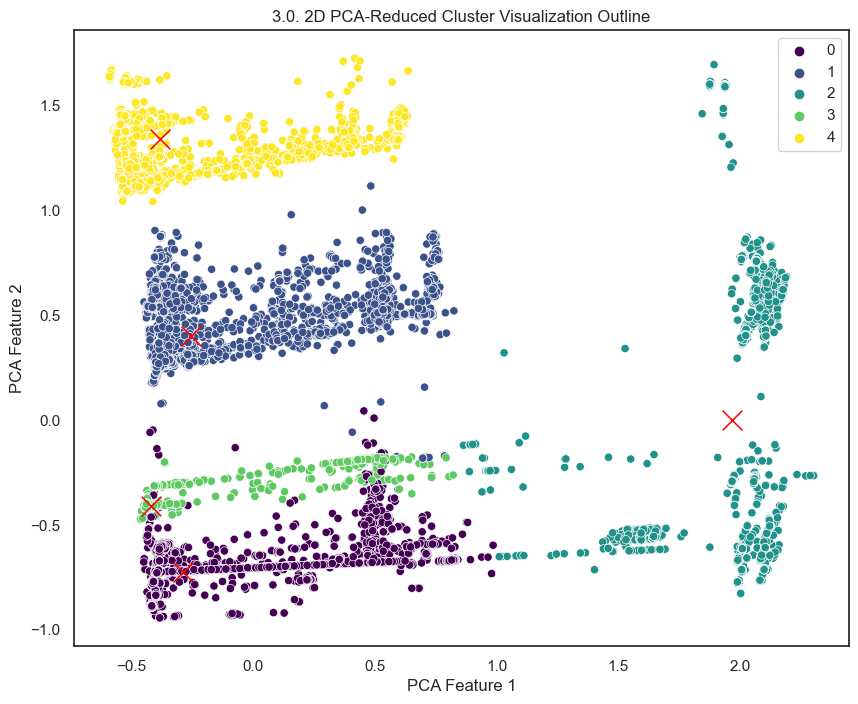

In [52]:
clusters = kmeans.fit_predict(data_sample)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_sample)

# Set Seaborn theme
sns.set_theme(style="white")
df_reduced = pd.DataFrame({'PCA Feature 1': reduced_data[:, 0], 'PCA Feature 2': reduced_data[:, 1], 'Clusters': clusters})

# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_reduced, x='PCA Feature 1', y='PCA Feature 2', hue='Clusters', palette='viridis', marker='o')
centers_reduced = pca.transform(cluster_centers)
sns.scatterplot(x=centers_reduced[:, 0], y=centers_reduced[:, 1], color='red', marker='x', s=200)

plt.title('3.0. 2D PCA-Reduced Cluster Visualization Outline')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')

save_path = r'C:\Users\Kolobane\OneDrive\CIT MSc Data Science Modules\_Semester Three - Final Project\Project Two - Network Project\Save Plots\kmeans_basic_pca_plot.png'
plt.savefig(save_path)

plt.show()

###### High value features

In [37]:
threshold = np.percentile(cluster_centers_array, 95)
high_value_features = np.where(cluster_centers_array >= threshold)
clusters_indices, feature_indices = high_value_features

# output the names and cluster number
for cluster_idx, feature_idx in zip(clusters_indices, feature_indices):
    feature_name = index_to_feature[feature_idx]  # Map index to name
    print(f"Cluster {cluster_idx} has a high value for feature {feature_name} ({feature_idx})")

NameError: name 'cluster_centers_array' is not defined

### elbow method results

In [38]:
elbow_method_results = df_model_kmeans_basic['elbow_method_results'].iloc[0]
print(elbow_method_results)

[15235748.0, 10844785.0, 7885015.0, 6389136.5, 5365713.5, 4731887.5, 4302375.0, 3918571.5, 3536609.75, 3298765.75]


- 15235748.0 when there is 1 clusters.
- 10844785.0 wheen there are 2 clusters.
- 7885015.0 where there are 3 clusters.
- etc.

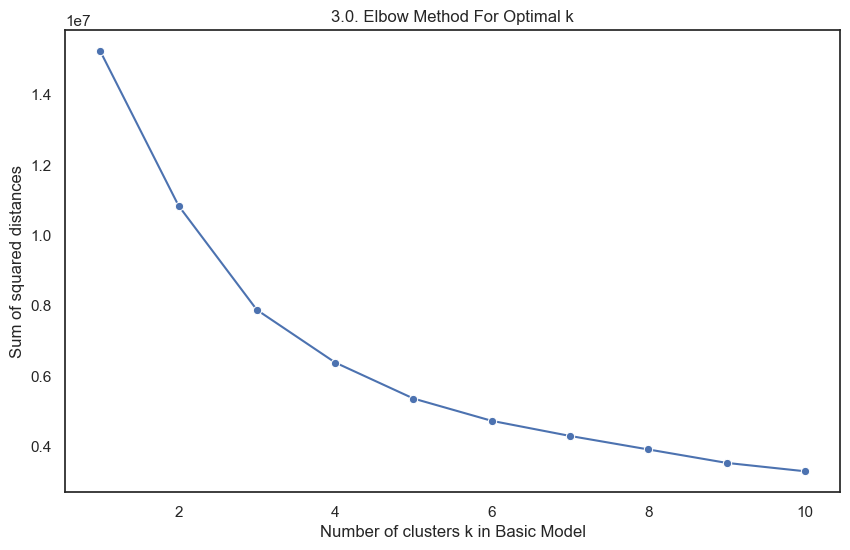

In [51]:
elbow_method_results = [15235748.0, 10844785.0, 7885015.0, 6389136.5, 5365713.5, 4731887.5, 4302375.0, 3918571.5, 3536609.75, 3298765.75]
sns.set_theme(style="white")

# Plot with sns
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 11), y=elbow_method_results, marker='o')

plt.title('3.0. Elbow Method For Optimal k')
plt.xlabel('Number of clusters k in Basic Model')
plt.ylabel('Sum of squared distances')

save_path = r'C:\Users\Kolobane\OneDrive\CIT MSc Data Science Modules\_Semester Three - Final Project\Project Two - Network Project\Save Plots\kmeans_elbow_plot.png'
plt.savefig(save_path)

plt.show()

Use 5 for the best model later.

### Model Training Time

In [111]:
model_training_time = df_model_kmeans_basic['model_training_time'].iloc[0]
print(model_training_time)

44.5696


### Size of Model

In [112]:
# print the size of the model for comparison.
model_path = r'C:\Users\Kolobane\OneDrive\CIT MSc Data Science Modules\_Semester Three - Final Project\Project Two - Network Project\ML Models\kmeans_model_baseline_basic.joblib'
file_size = os.path.getsize(model_path)
file_size_mb = file_size / (1024 * 1024)
print(f"Model file size: {file_size_mb:.2f} MB")

Model file size: 24.63 MB


---

## **Kmeans Best Search Results**

In [40]:
# Establish a new database connection using the config dictionary
cnx = mysql.connector.connect(**config)
cursor = cnx.cursor()

# Retreve the data from the RF basic model
model_id = 5
query = f"SELECT * FROM baseline_model_results WHERE id= {model_id};"
df_model_kmeans_best =pd.read_sql(query, cnx)

cursor.close()
cnx.close()

In [41]:
df_model_kmeans_best

,id,model_name,timestamp,model_parameters,confusion_matrix,accuracy_value,precision_value,recall_value,f1_value,auc_score,...,model_training_time,silhouette_score,cluster_centers,elbow_method_results,cluster_visualisation_plot,anomaly_score,anomaly_detection_plot,decision_function_values,support_vectors,one_class_svm_plot
0,5,kmeans_model_baseline_best_serach,2023-11-22 15:40:46,"{""algorithm"": ""lloyd"", ""copy_x"": true, ""init"":...",None,None,None,None,None,None,...,100.452,0.449331,"[[0.010384276509284971, 0.9661535024642944, 0....","[15235748.0, 10844785.0, 7885015.0, 6389136.5,...","{""data_points"": {""x"": [0.0013115183683112264, ...",None,None,None,None,None


### SilhouetteScore

In [42]:
silhouette_score = df_model_kmeans_best['silhouette_score'].iloc[0]
print(silhouette_score)

0.449331


### cluster centers

In [43]:
cluster_centers_json = df_model_kmeans_best['cluster_centers'].iloc[0]
cluster_centers = json.loads(cluster_centers_json)
print(cluster_centers)

[[0.010384276509284971, 0.9661535024642944, 0.01886549592018127, 0.00027041148860007524, 4.3511856347322464e-05, 0.00027446565218269825, 2.5355257093906403e-06, 0.00774841383099556, 0.027766387909650803, 0.024164564907550812, 8.574128150939941e-05, 0.010260768234729769, 0.06892994046211243, 0.019773459061980247, 0.0001553669571876526, 0.00013799965381622314, 0.0014209263026714325, 0.0014645904302597046, 0.001863852143287659, 0.004557311534881592, 0.0008278191089630127, 0.01874108612537384, 0.0017776340246200562, 0.0013947216793894768, 0.0043480247259140015, 0.0011611729860305786, 0.0024531930685043335, 0.0007419008761644363, 0.0002894597128033638, 0.0009881537407636642, 0.0005904675927013159, -3.332644701004028e-05, 1.1346128303557634e-07, 0.00027170253451913595, 1.9761500880122185e-05, 0.0011629890650510788, 0.0006321221590042114, 0.02980535104870796, 0.005869321525096893, 0.012313425540924072, 0.006303828209638596, 0.0002970360219478607, 0.010617724619805813, -3.332644701004028e-05, 

#### Feature Importance for each cluster: 5 clusters in this model

In [44]:
cluster_centers = np.array(cluster_centers)

In [45]:
num_top_features = 5

In [46]:
for i, center in enumerate(cluster_centers):
    # get the indices of the highest features
    top_features_idx = np.argsort(center)[-num_top_features:]
    # Then get the names of these indices
    top_features_names = [feature_names[idx] for idx in top_features_idx]
    # Print the cluster number and feature names.
    print(f"Cluster {i+1}: Dominant Features: {top_features_names}")


Cluster 1: Dominant Features: ['Fwd Pkt Len Min', 'Pkt Len Min', 'Bwd Pkt Len Min', 'Fwd Seg Size Min', 'Protocol']
Cluster 2: Dominant Features: ['Flow IAT Mean', 'Fwd IAT Mean', 'Fwd IAT Min', 'Fwd IAT Tot', 'Flow Duration']
Cluster 3: Dominant Features: ['Fwd Seg Size Min', 'Init Bwd Win Byts', 'PSH Flag Cnt', 'ECE Flag Cnt', 'RST Flag Cnt']
Cluster 4: Dominant Features: ['Init Fwd Win Byts', 'Init Bwd Win Byts', 'Protocol', 'Fwd Seg Size Min', 'PSH Flag Cnt']
Cluster 5: Dominant Features: ['Fwd PSH Flags', 'Dst Port', 'Protocol', 'Fwd Seg Size Min', 'ACK Flag Cnt']


#### Plot clusters

In [47]:
# load baseline model.
kmeans = load(r'C:\Users\Kolobane\OneDrive\CIT MSc Data Science Modules\_Semester Three - Final Project\Project Two - Network Project\ML Models\kmeans_model_baseline_best_serach.joblib')

In [48]:
# Load sample data
file_path = r'C:\Users\Kolobane\OneDrive\CIT MSc Data Science Modules\_Semester Three - Final Project\Project Two - Network Project\ML Models\sample_file.pkl'
data_sample = pd.read_pickle(file_path)

In [49]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_sample)
clusters = kmeans.predict(data_sample)
centers_reduced = pca.transform(kmeans.cluster_centers_)

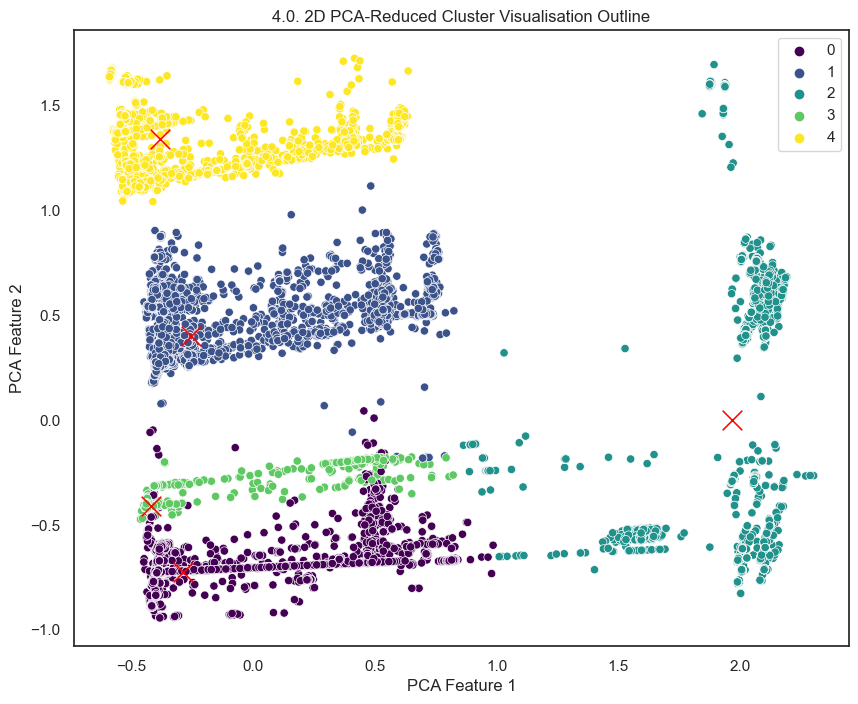

In [53]:
# theeme
sns.set_theme(style="white")

plt.figure(figsize=(10, 8))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=clusters, palette='viridis', marker='o')
centers_reduced = pca.transform(cluster_centers)
sns.scatterplot(x=centers_reduced[:, 0], y=centers_reduced[:, 1], color='red', marker='x', s=200,linewidths=3)  

plt.title('4.0. 2D PCA-Reduced Cluster Visualisation Outline')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
save_path = r'C:\Users\Kolobane\OneDrive\CIT MSc Data Science Modules\_Semester Three - Final Project\Project Two - Network Project\Save Plots\kmeans_best_pca_plot.png'
plt.savefig(save_path)
plt.show()

### Model Training Time

Use 5 for the best model later.

In [234]:
model_training_time = df_model_kmeans_best['model_training_time'].iloc[0]
print(model_training_time)

100.452


### Size of Model

In [211]:
# print the size of the model for comparison.
model_path = r'C:\Users\Kolobane\OneDrive\CIT MSc Data Science Modules\_Semester Three - Final Project\Project Two - Network Project\ML Models\kmeans_model_baseline_best_serach.joblib'
file_size = os.path.getsize(model_path)
file_size_mb = file_size / (1024 * 1024)
print(f"Model file size: {file_size_mb:.2f} MB")

Model file size: 24.63 MB


---

## **Isolate Forest Basic Results**

In [72]:
# Establish a new database connection using the config dictionary
cnx = mysql.connector.connect(**config)
cursor = cnx.cursor()

# Retreve the data from the RF basic model
model_id = 8
query = f"SELECT * FROM baseline_model_results WHERE id= {model_id};"
df_model_iso_basic =pd.read_sql(query, cnx)

cursor.close()
cnx.close()

In [73]:
df_model_iso_basic

,id,model_name,timestamp,model_parameters,confusion_matrix,accuracy_value,precision_value,recall_value,f1_value,auc_score,...,model_training_time,silhouette_score,cluster_centers,elbow_method_results,cluster_visualisation_plot,anomaly_score,anomaly_detection_plot,decision_function_values,support_vectors,one_class_svm_plot
0,8,iso_model_baseline_basic,2023-11-29 10:12:07,"{""bootstrap"": false, ""contamination"": ""auto"", ...","[[579898, 89615], [125090, 12257]]",0.733901,0.471441,0.477695,0.473135,None,...,5.78425,0.249068,None,None,None,"[0.11002938116378808, 0.13788934680852677, 0.0...","{""x_axis"": [0.0013115183683112264, 0.006759746...",None,None,None


### Anomaly Score

In [74]:
print(df_model_iso_basic['anomaly_score'].head())

0    [0.11002938116378808, 0.13788934680852677, 0.0...
Name: anomaly_score, dtype: object


In [75]:
print(type(df_model_iso_basic['anomaly_score'].iloc[0]))

<class 'str'>


In [76]:
def custom_parse_anomaly_score(s):
    cleaned = s.strip('[]') # clean away the []
    return[float(item) for item in cleaned.split(',')]

In [77]:
df_model_iso_basic['anomaly_score'] = df_model_iso_basic['anomaly_score'].apply(custom_parse_anomaly_score)
df_model_iso_basic['anomaly_score'] 

0    [0.11002938116378808, 0.13788934680852677, 0.0...
Name: anomaly_score, dtype: object

In [1]:
threshold = df_model_iso_basic['anomaly_score'].quantile(0.05)
df_model_iso_basic['Anomaly'] = df_model_iso_basic['anomaly_score'] < threshold

### Results of model

In [56]:
print(df_model_iso_basic['accuracy_value'].iloc[0])
print(df_model_iso_basic['precision_value'].iloc[0])
print(df_model_iso_basic['recall_value'].iloc[0])
print(df_model_iso_basic['f1_value'].iloc[0])

0.733901
0.471441
0.477695
0.473135


### Confusion Matrix

In [57]:
# Extact Json obsjects into useable data and parse into a 2d array
confusion_matrix_json = df_model_iso_basic['confusion_matrix'].iloc[0]
confusion_matrix = np.array(json.loads(confusion_matrix_json))

In [58]:
confusion_matrix

array([[579898,  89615],
       [125090,  12257]])

### Anomaly Score 

In [59]:
# extract json files
anomaly_score = json.loads(df_model_iso_basic['anomaly_score'].iloc[0])
anomaly_detection_plot = json.loads(df_model_iso_basic['anomaly_detection_plot'].iloc[0])

In [60]:
# Convert to a pandas object
anomaly_score_series = pd.Series(anomaly_score)

# summary statistics
print(anomaly_score_series.describe())

count    806860.000000
mean          0.104273
std           0.071642
min          -0.267555
25%           0.070268
50%           0.132966
75%           0.161543
max           0.175475
dtype: float64


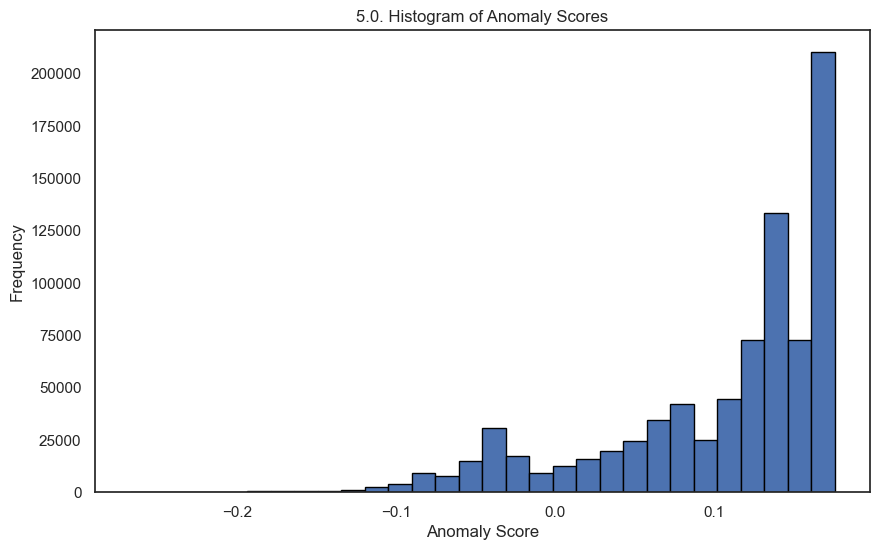

In [61]:
# Assuming anomaly_score is a list or array of anomaly scores
plt.figure(figsize=(10, 6))
plt.hist(anomaly_score, bins=30, edgecolor='black')
plt.title('5.0. Histogram of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')


save_path = r'C:\Users\Kolobane\OneDrive\CIT MSc Data Science Modules\_Semester Three - Final Project\Project Two - Network Project\Save Plots\ios_basic_model_histogram.png'
plt.savefig(save_path)
plt.show()

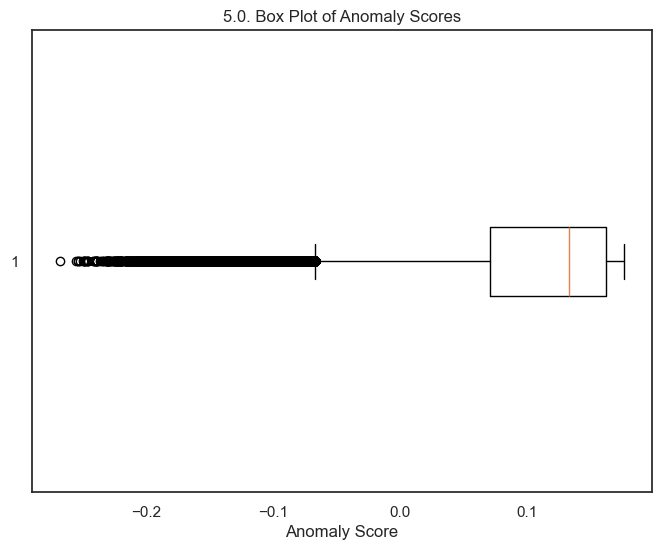

In [62]:
plt.figure(figsize=(8, 6))
plt.boxplot(anomaly_score, vert=False)
plt.title('5.0. Box Plot of Anomaly Scores')
plt.xlabel('Anomaly Score')

save_path = r'C:\Users\Kolobane\OneDrive\CIT MSc Data Science Modules\_Semester Three - Final Project\Project Two - Network Project\Save Plots\iso_basic_model_boxplot.png'
plt.savefig(save_path)
plt.show()

Intercept

### Anomaly Detection Plot

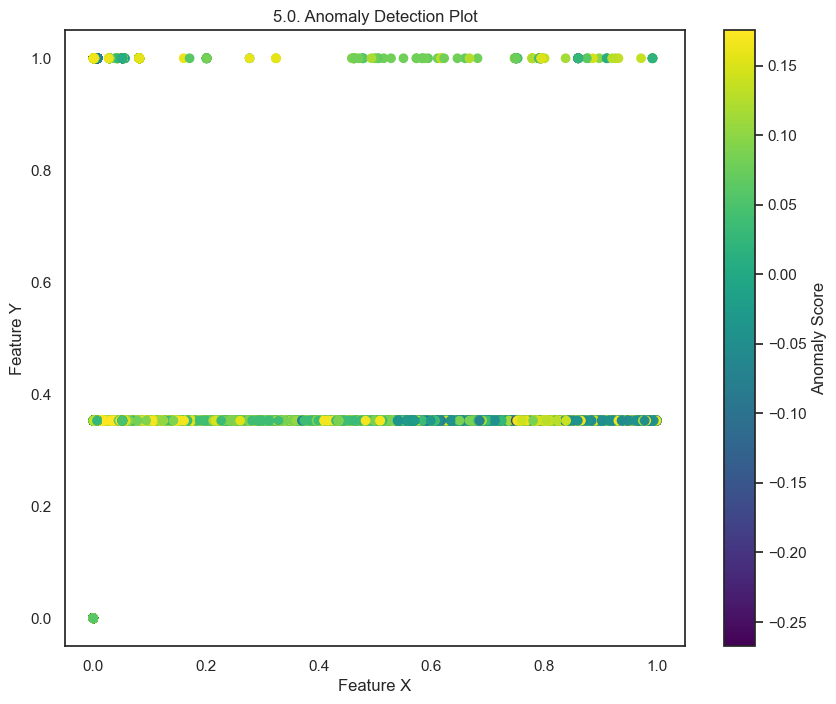

In [63]:
x_axis = anomaly_detection_plot['x_axis']
y_axis = anomaly_detection_plot['y_axis']

plt.figure(figsize=(10, 8))
plt.scatter(x_axis, y_axis, c=anomaly_score, cmap='viridis')  # Color by anomaly score
plt.colorbar(label='Anomaly Score')
plt.title('5.0. Anomaly Detection Plot')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')


# save_path = r'C:\Users\Kolobane\OneDrive\CIT MSc Data Science Modules\_Semester Three - Final Project\Project Two - Network Project\Save Plots\iso_basic_model_anomaly_detection.png'
# plt.savefig(save_path)
plt.show()

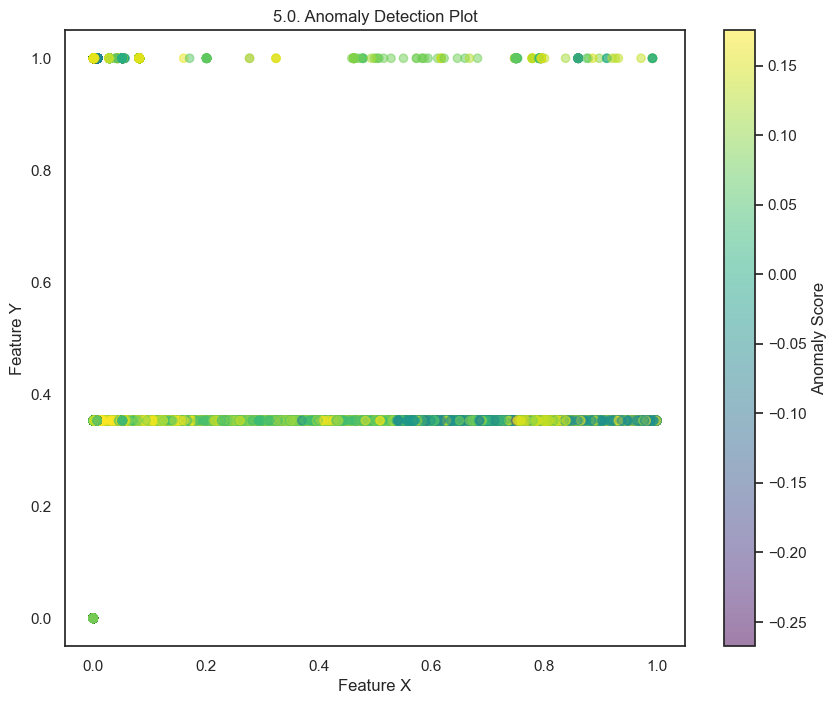

In [66]:
plt.figure(figsize=(10, 8))
plt.scatter(x_axis, y_axis, c=anomaly_score, cmap='viridis', alpha=0.5)  # Added alpha for opacity
plt.colorbar(label='Anomaly Score')
plt.title('5.0. Anomaly Detection Plot')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.show()

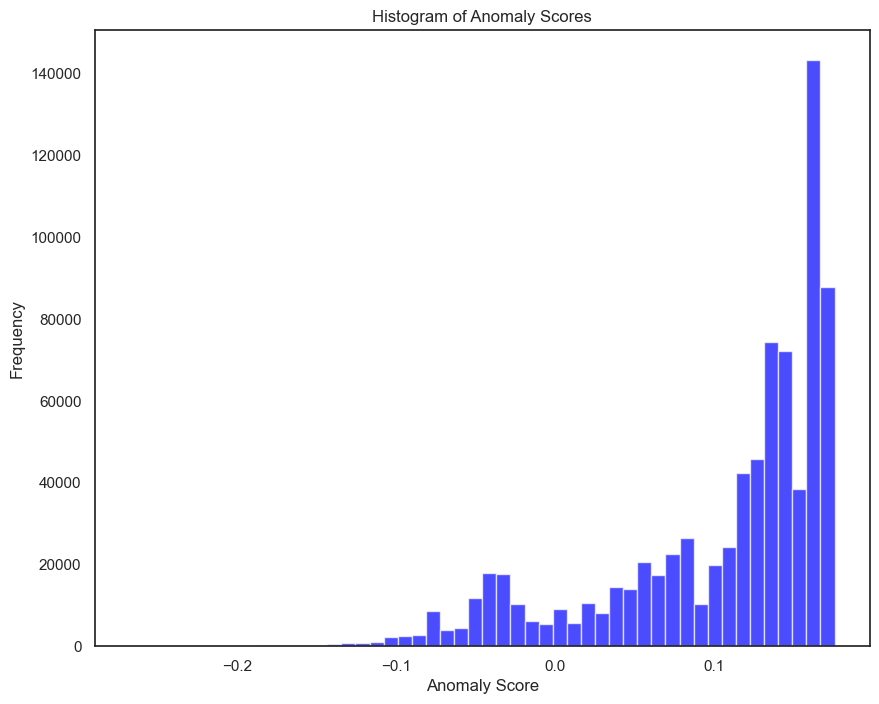

In [67]:
plt.figure(figsize=(10, 8))
plt.hist(anomaly_score, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()

### Model Training Time

In [64]:
model_training_time = df_model_iso_basic['model_training_time'].iloc[0]
print(model_training_time)

5.78425


### Size of Model

In [65]:
# print the size of the model for comparison.
model_path = r'C:\Users\Kolobane\OneDrive\CIT MSc Data Science Modules\_Semester Three - Final Project\Project Two - Network Project\ML Models\iso_model_baseline_basic_8.joblib'
file_size = os.path.getsize(model_path)
file_size_mb = file_size / (1024 * 1024)
print(f"Model file size: {file_size_mb:.2f} MB")

Model file size: 0.61 MB


---

## **Isolate Forest Best Search Results**

In [152]:
# Establish a new database connection using the config dictionary
cnx = mysql.connector.connect(**config)
cursor = cnx.cursor()

# Retreve the data from the RF basic model
model_id = 7
query = f"SELECT * FROM baseline_model_results WHERE id= {model_id};"
df_model_iso_best =pd.read_sql(query, cnx)

cursor.close()
cnx.close()

In [153]:
df_model_iso_best

,id,model_name,timestamp,model_parameters,confusion_matrix,accuracy_value,precision_value,recall_value,f1_value,auc_score,...,model_training_time,silhouette_score,cluster_centers,elbow_method_results,cluster_visualisation_plot,anomaly_score,anomaly_detection_plot,decision_function_values,support_vectors,one_class_svm_plot
0,7,iso_model_baseline_best,2023-11-24 09:09:52,"{""bootstrap"": false, ""contamination"": 0.13, ""m...","[[0, 0, 0], [87211, 0, 582302], [17701, 0, 119...",0.148286,0.056816,0.290374,0.095037,None,...,1843.9,0.267757,None,None,None,"[0.11002938116378808, 0.13788934680852677, 0.0...","{""x_axis"": [0.0013115183683112264, 0.006759746...",None,None,None


### Results of model

In [154]:
print(df_model_iso_best['accuracy_value'].iloc[0])
print(df_model_iso_best['precision_value'].iloc[0])
print(df_model_iso_best['recall_value'].iloc[0])
print(df_model_iso_best['f1_value'].iloc[0])

0.148286
0.0568162
0.290374
0.0950369


### Confusion Matrix

In [155]:
# Extact Json obsjects into useable data and parse into a 2d array
confusion_matrix_json = df_model_iso_best['confusion_matrix'].iloc[0]
confusion_matrix = np.array(json.loads(confusion_matrix_json))

In [156]:
confusion_matrix

array([[     0,      0,      0],
       [ 87211,      0, 582302],
       [ 17701,      0, 119646]])

In [140]:
df_model_iso_basic

,id,model_name,timestamp,model_parameters,confusion_matrix,accuracy_value,precision_value,recall_value,f1_value,auc_score,...,model_training_time,silhouette_score,cluster_centers,elbow_method_results,cluster_visualisation_plot,anomaly_score,anomaly_detection_plot,decision_function_values,support_vectors,one_class_svm_plot
0,4,iso_model_baseline_basic,2023-11-16 11:50:10,"{""bootstrap"": false, ""contamination"": ""auto"", ...","[[579898, 89615], [125090, 12257]]",0.733901,0.471441,0.477695,0.473135,None,...,5.20307,None,None,None,None,"[0.11002938116378808, 0.13788934680852677, 0.0...","{""x_axis"": [0.0013115183683112264, 0.006759746...",None,None,None


### Anomaly Score 

In [143]:
# extract json files
anomaly_score = json.loads(df_model_iso_basic['anomaly_score'].iloc[0])
anomaly_detection_plot = json.loads(df_model_iso_basic['anomaly_detection_plot'].iloc[0])

In [146]:
# Convert to a pandas object
anomaly_score_series = pd.Series(anomaly_score)

# summary statistics
print(anomaly_score_series.describe())

count    806860.000000
mean          0.104273
std           0.071642
min          -0.267555
25%           0.070268
50%           0.132966
75%           0.161543
max           0.175475
dtype: float64


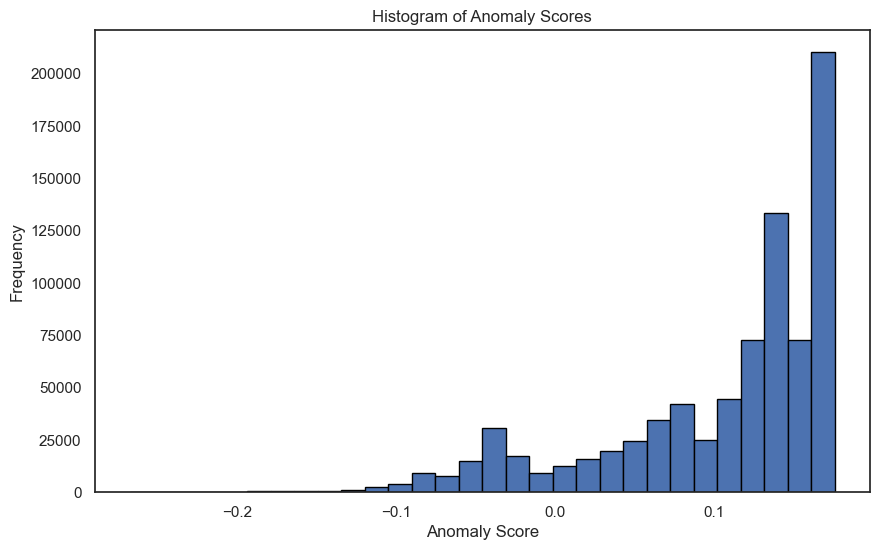

In [149]:
# Assuming anomaly_score is a list or array of anomaly scores
plt.figure(figsize=(10, 6))
plt.hist(anomaly_score, bins=30, edgecolor='black')
plt.title('Histogram of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')


save_path = r'C:\Users\Kolobane\OneDrive\CIT MSc Data Science Modules\_Semester Three - Final Project\Project Two - Network Project\Save Plots\ios_basic_model_histogram.png'
plt.savefig(save_path)
plt.show()

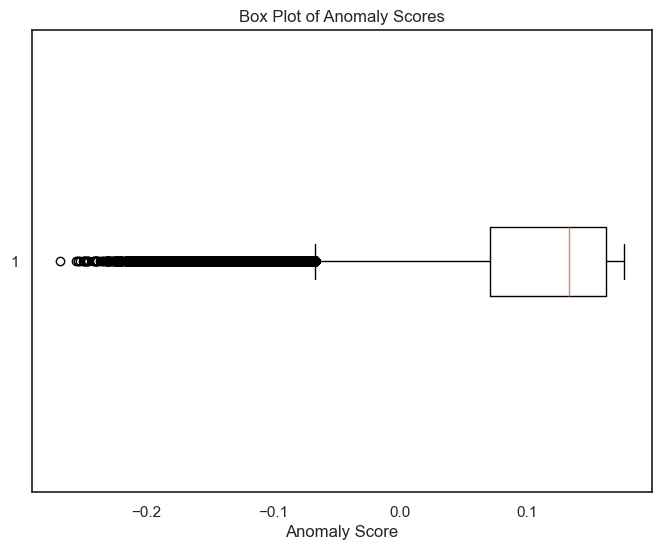

In [150]:
plt.figure(figsize=(8, 6))
plt.boxplot(anomaly_score, vert=False)
plt.title('Box Plot of Anomaly Scores')
plt.xlabel('Anomaly Score')

save_path = r'C:\Users\Kolobane\OneDrive\CIT MSc Data Science Modules\_Semester Three - Final Project\Project Two - Network Project\Save Plots\iso_basic_model_boxplot.png'
plt.savefig(save_path)
plt.show()

Intercept

### Anomaly Detection Plot

In [ ]:
x_axis = anomaly_detection_plot['x_axis']
y_axis = anomaly_detection_plot['y_axis']

plt.figure(figsize=(10, 8))
plt.scatter(x_axis, y_axis, c=anomaly_score, cmap='viridis')  # Color by anomaly score
plt.colorbar(label='Anomaly Score')
plt.title('Anomaly Detection Plot')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')


save_path = r'C:\Users\Kolobane\OneDrive\CIT MSc Data Science Modules\_Semester Three - Final Project\Project Two - Network Project\Save Plots\iso_basic_model_anomaly_detection.png'
plt.savefig(save_path)
plt.show()

### Model Training Time

In [141]:
model_training_time = df_model_iso_basic['model_training_time'].iloc[0]
print(model_training_time)

5.20307


### Size of Model

In [142]:
# print the size of the model for comparison.
model_path = r'C:\Users\Kolobane\OneDrive\CIT MSc Data Science Modules\_Semester Three - Final Project\Project Two - Network Project\ML Models\iso_model_baseline_basic_2.joblib'
file_size = os.path.getsize(model_path)
file_size_mb = file_size / (1024 * 1024)
print(f"Model file size: {file_size_mb:.2f} MB")

Model file size: 0.61 MB


---

## **One Class SVM Baseline Model 2: 10 percentage Model**

In [9]:
# Establish a new database connection using the config dictionary
cnx = mysql.connector.connect(**config)
cursor = cnx.cursor()

# Retreve the data from the RF basic model
model_id = 9
query = f"SELECT * FROM baseline_model_results WHERE id= {model_id};"
df_model_svm_model_2 =pd.read_sql(query, cnx)

cursor.close()
cnx.close()

In [14]:
df_model_svm_model_2

,id,model_name,timestamp,model_parameters,confusion_matrix,accuracy_value,precision_value,recall_value,f1_value,auc_score,...,model_training_time,silhouette_score,cluster_centers,elbow_method_results,cluster_visualisation_plot,anomaly_score,anomaly_detection_plot,decision_function_values,support_vectors,one_class_svm_plot
0,9,oc_svm_model_baseline_basic_10_perc,2023-12-05 12:41:45,"{""cache_size"": 200, ""coef0"": 0.0, ""degree"": 3,...",None,None,None,None,None,None,...,19193.3,-0.119788,None,None,None,None,None,None,"[[0.0, 0.0, 0.9386538863182068, 0.000007141785...",None


### Silhouette Score

In [12]:
silhouette_score = df_model_svm_model_2['silhouette_score'].iloc[0]
print(silhouette_score)

-0.119788


### Support Vectors

In [16]:
support_vectors = df_model_svm_model_2['support_vectors'].iloc[0]
print(support_vectors)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



---

### Model Training Time

In [11]:
model_training_time = df_model_svm_model_2['model_training_time'].iloc[0]
print(model_training_time)

19193.3


### Size of Model

In [ ]:
# print the size of the model for comparison.
model_path = r'C:\Users\Kolobane\OneDrive\CIT MSc Data Science Modules\_Semester Three - Final Project\Project Two - Network Project\ML Models\iso_model_baseline_basic_2.joblib'
file_size = os.path.getsize(model_path)
file_size_mb = file_size / (1024 * 1024)
print(f"Model file size: {file_size_mb:.2f} MB")

---